# Summer Analytics Capstone Project by C&A Club, IIT Guwahati

This challenge is the capstone project of the Summer Analytics, a primer course on Data Science, conducted by Consulting and Analytics Club of IIT Guwahati in the summers. 
The dataset is provided by DeltaX. DeltaX is the pioneering cross-channel digital advertising platform. The cloud-based platform leverages big data, user behavior, and machine learning algorithms to improve performance across the business funnel of advertisers.

## Problem Statement

Let's take a case where an advertiser on the platform (DeltaX) would like to estimate the performance of their campaign in the future. Imagine it is the first day of March and you are given the past performance data of ads between 1st August to 28th Feb. You are now tasked to predict an ad's future performance (revenue) between March 1st and March 15th.

## Data Description

Given data is the ad performance for the dates between 1st August 2020 and 28th Feb 2021. It contains various columns whose description is as follows  
date: the date on which the ad was made live  
campaign: campaign number  
adgroup: adgroup number  
ad: ad number  
impressions - Number of time the ad was shown  
clicks - Number of time the ad clicked shown  
cost - Amount spent to show ad  
conversions - Number of transactions received  
revenue: revenue generated from the ad

# Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
import catboost as cb
import warnings 
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('Hack_Train_Data.csv',parse_dates=True,index_col='date')
test_df = pd.read_csv('Hack_Test_Data.csv',parse_dates=True,index_col='date')
df = pd.concat([train_df,test_df])

In [3]:
df.head()

campaign    adgroup    ad  impressions  clicks  cost  \
date                                                                 
2020-01-08  campaign 1  adgroup 1  ad 1           24       6  0.08   
2020-01-08  campaign 1  adgroup 2  ad 1            1       0  0.00   
2020-01-08  campaign 1  adgroup 3  ad 1           13       4  0.04   
2020-01-08  campaign 1  adgroup 4  ad 1            5       4  0.08   
2020-01-08  campaign 1  adgroup 1  ad 2          247     126  1.29   

            conversions  revenue  
date                              
2020-01-08            0     0.00  
2020-01-08            0     0.00  
2020-01-08            0     0.00  
2020-01-08            0     0.00  
2020-01-08            4   925.71

In [4]:
df.describe()

impressions       clicks         cost  conversions       revenue
count  4889.000000  4889.000000  4889.000000  4889.000000   4571.000000
mean     90.977705    42.454899     2.643461     1.304357    231.865340
std     193.610988    97.591346    13.900229     5.073662   1091.742763
min       1.000000     0.000000     0.000000     0.000000      0.000000
25%       5.000000     2.000000     0.040000     0.000000      0.000000
50%      16.000000     7.000000     0.190000     0.000000      0.000000
75%      85.000000    38.000000     1.260000     1.000000     92.600000
max    3239.000000  1771.000000   531.250000    94.000000  20515.410000

# Initial Checking 

In [5]:
train_df.head()

campaign    adgroup    ad  impressions  clicks  cost  \
date                                                                 
2020-01-08  campaign 1  adgroup 1  ad 1           24       6  0.08   
2020-01-08  campaign 1  adgroup 2  ad 1            1       0  0.00   
2020-01-08  campaign 1  adgroup 3  ad 1           13       4  0.04   
2020-01-08  campaign 1  adgroup 4  ad 1            5       4  0.08   
2020-01-08  campaign 1  adgroup 1  ad 2          247     126  1.29   

            conversions  revenue  
date                              
2020-01-08            0     0.00  
2020-01-08            0     0.00  
2020-01-08            0     0.00  
2020-01-08            0     0.00  
2020-01-08            4   925.71

In [6]:
test_df.head()

campaign    adgroup    ad  cost  impressions  clicks  \
date                                                                 
2021-01-03  campaign 1  adgroup 1  ad 1  0.58          121      49   
2021-01-03  campaign 1  adgroup 3  ad 1  0.17           22      12   
2021-01-03  campaign 1  adgroup 4  ad 1  0.05            5       3   
2021-01-03  campaign 1  adgroup 2  ad 1  0.01            2       1   
2021-01-03  campaign 1  adgroup 2  ad 2  0.01            3       1   

            conversions  
date                     
2021-01-03            1  
2021-01-03            0  
2021-01-03            0  
2021-01-03            0  
2021-01-03            0

In [7]:
train_df.isnull().sum()

campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [8]:
test_df.isnull().sum()

campaign       0
adgroup        0
ad             0
cost           0
impressions    0
clicks         0
conversions    0
dtype: int64

In [9]:
print(train_df.campaign.value_counts())
print(test_df.campaign.value_counts())

campaign 1    4571
Name: campaign, dtype: int64
campaign 1    318
Name: campaign, dtype: int64


# Visualisation

In [10]:
sns.set(rc={"figure.figsize":(12, 5)});

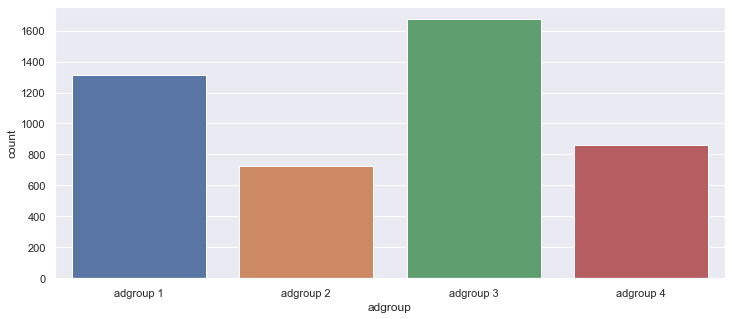

In [11]:
sns.countplot(x=train_df.adgroup);

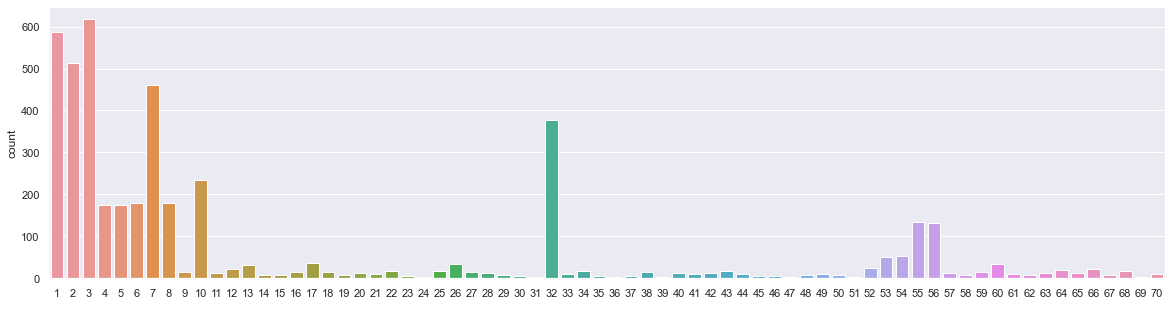

In [12]:
labels = np.arange(1,71)
sns.set(rc={"figure.figsize":(20, 5)});
ax = sns.countplot(x = train_df.ad);
ax.set(xlabel=' ');
ax.set_xticklabels(labels);

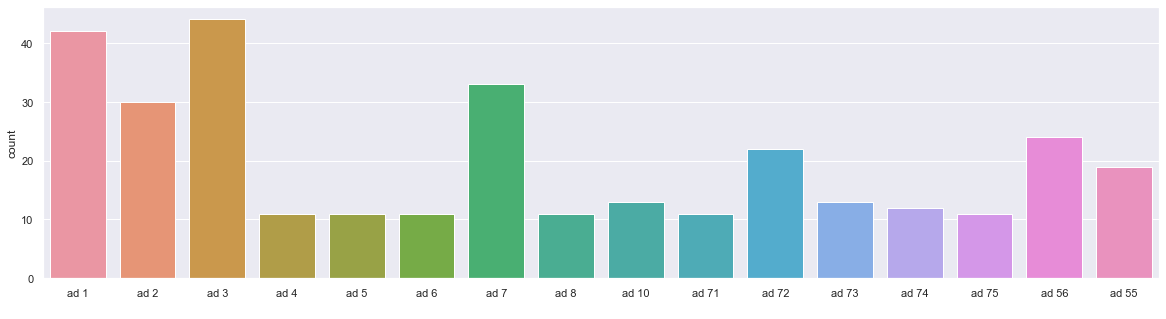

In [13]:
ax = sns.countplot(x = test_df.ad);
ax.set(xlabel=' ');

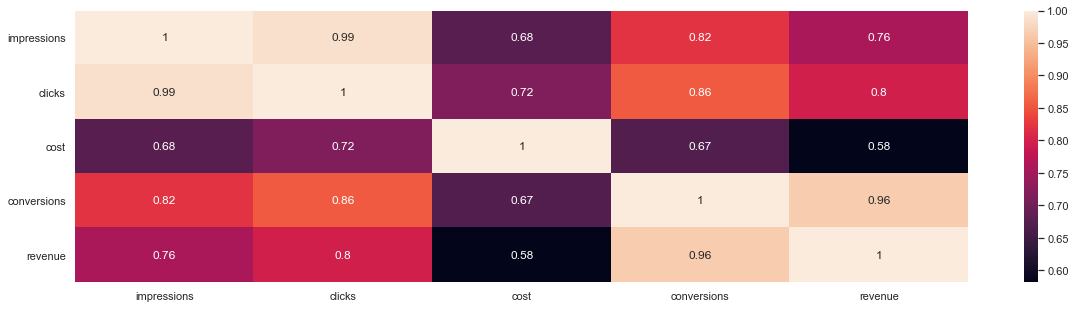

In [14]:
sns.heatmap(df.corr(),annot = True);

<AxesSubplot:xlabel='adgroup', ylabel='revenue'>

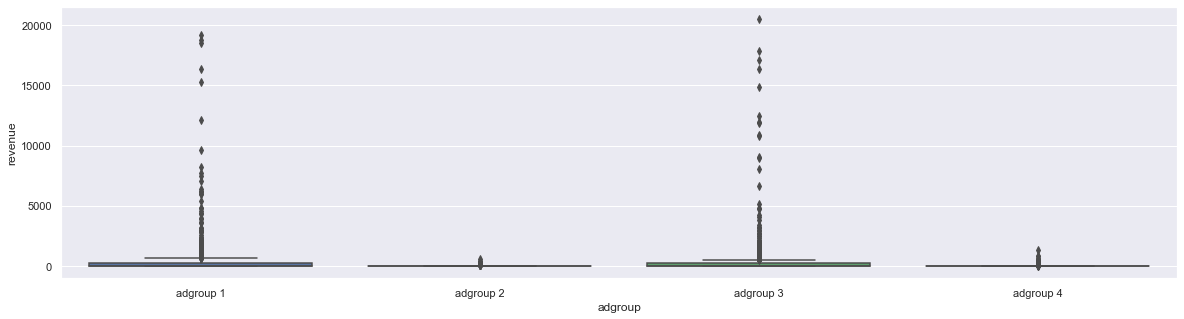

In [15]:
sns.boxplot(x = train_df.adgroup, y=train_df.revenue)

Almost on every day revenue generated is zero for adgroup 2 and 4. This is in contrast to adgroups 1 and 3

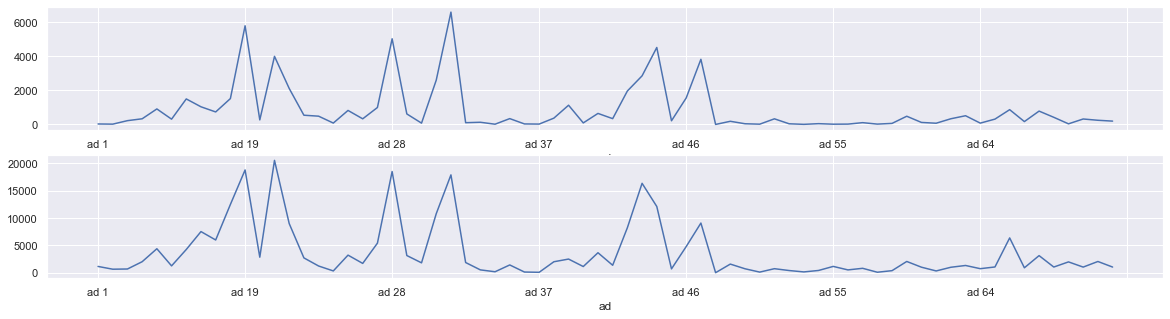

In [16]:
plt.subplot(2,1,1)
train_df.groupby('ad').revenue.mean().plot();
plt.subplot(2,1,2)
train_df.groupby('ad').revenue.max().plot();

Some ads perform much better compared to others

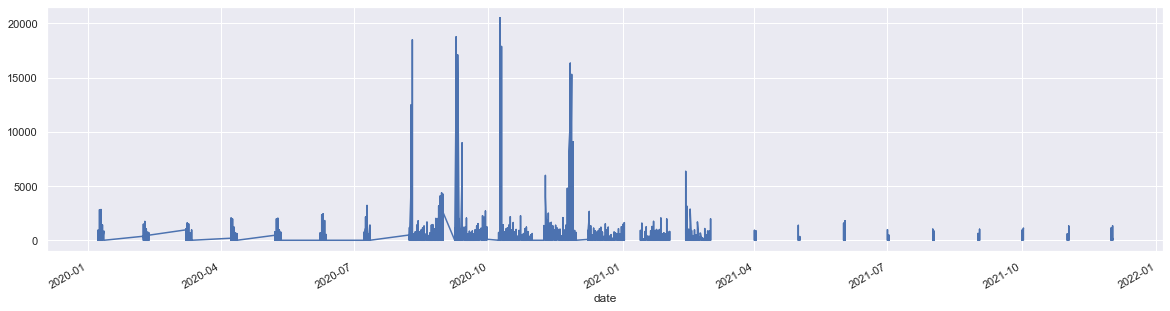

In [17]:
df.revenue.plot(figsize=(20,5));

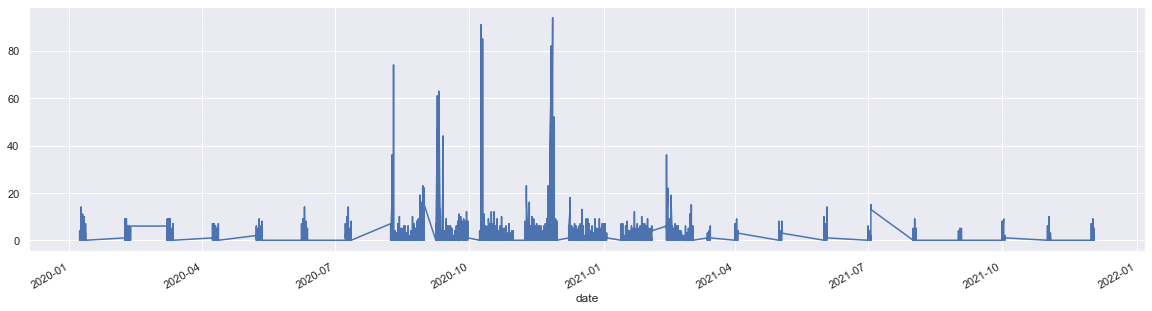

In [18]:
df.conversions.plot(figsize=(20,5));

<AxesSubplot:xlabel='date'>

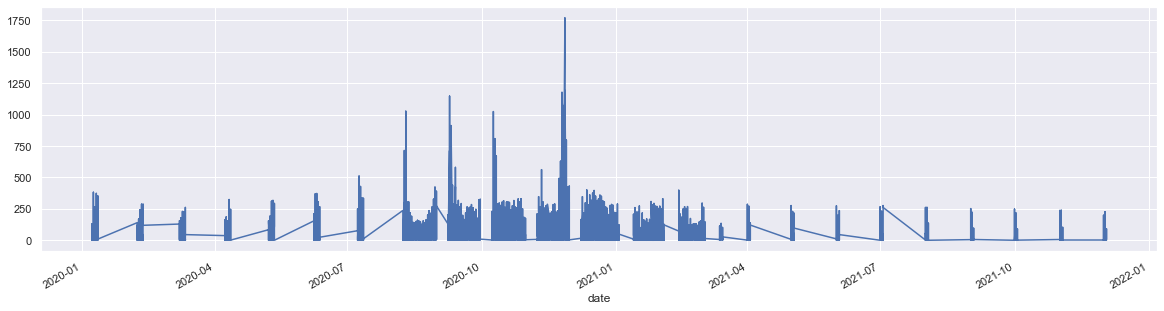

In [19]:
df.clicks.plot(figsize=(20,5))

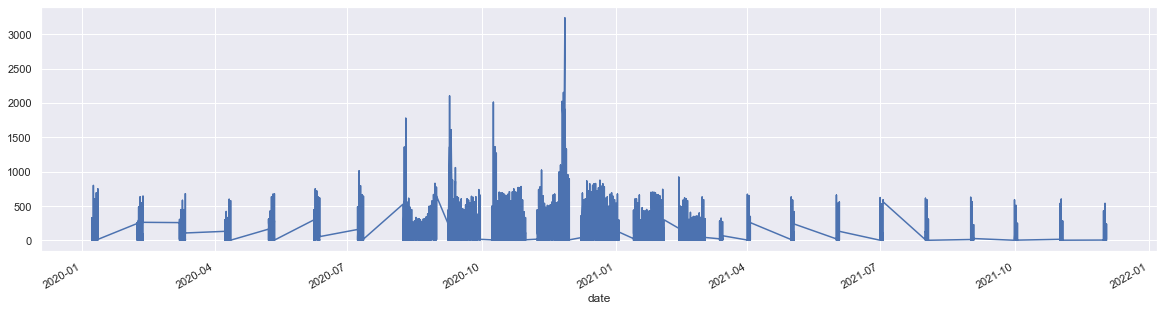

In [20]:
df.impressions.plot(figsize=(20,5));

In [21]:
sns.pairplot(data=df,diag_kind='kde');

In [22]:
df[(df['conversions']==0)].revenue.max()

0.0

Whenever conversions is zero, revenue is zero in entire data, which makes sense, as no transactions would mean no revenue

In [23]:
df[(df['revenue']==0)].conversions.max()

3

Revenue can be zero without conversions being zero


# Feature Engineering



CTR - Clicks / Impression (higher the better - used to evaluate if the users find the ad relevant)  
CPC - Cost / Click (lower the better - used to evaluate if the cost for getting a click)  
CPA - Cost / Conversion (lower the better - used to evaluate if the cost for getting a conversion)  
ROI - Revenue/Cost (higher the better - used to evaluate the effectiveness of the advertising budget spent  

In [24]:
df['CPC'] = df['cost']/df['impressions']
df['CTR'] = df['clicks']/df['impressions']
df['CPA'] = df['cost']/df['conversions']
df['ROI'] = df['revenue']/df['cost']

## Advalue imputer

In [25]:
ad_value={}
for ad in train_df.groupby('ad').revenue.mean().index:
    ad_value[ad] = train_df.groupby('ad').revenue.mean()[ad]
total_median = train_df.groupby('ad').revenue.mean().median()
total_median

324.80083333333334

In [26]:
def meanimputer(ad):
    if ad in ad_value:
        return ad_value[ad]
    else:
        return total_median

In [27]:
df['ad_value'] = df['ad'].apply(meanimputer)

In [28]:
# Taking relevance of ad into picture
df['ad_value3'] = df['ad_value']*df['CTR']

## ROI Imputer

In [29]:
# ROI imputer
mean = df['ROI'].mean()
def roi(val):
    if val[1] == 0 and val[2] == 0:
        return mean
    else :
        return val[0]

In [30]:
df['ROI'] = df[['ROI','cost','revenue']].apply(roi,axis=1)

In [31]:
df['ROI'].isnull().sum()

318

## CPA misssing values filling

In [32]:
df['CPA'].median()

inf

In [33]:
df.CPA.fillna(value=df.CPA.median(),inplace=True)

## Average ROI for various ads

In [34]:
ad_value={}
for ad in df.groupby('ad').ROI.mean().index:
    ad_value[ad] = df.groupby('ad').ROI.mean()[ad]
total_group_median = df.groupby('adgroup').ROI.mean().mean()
total_median = df.groupby('ad').ROI.mean().mean()

In [35]:
def adimputer(ad):
    if ad in ad_value and str(ad_value[ad]) != 'nan':
        return ad_value[ad]
    else:
        return total_median

In [36]:
df['ad_value2'] = df['ad'].apply(adimputer)
df['ad_value4'] = df['ad_value2']*df['CTR']

In [37]:
def function(ad):
    getval = int(ad[3:])
    if ad in test_df.ad.unique() and ad in train_df.ad.unique():
        return getval
    else:
        return 0

In [38]:
df.head()

campaign    adgroup    ad  impressions  clicks  cost  \
date                                                                 
2020-01-08  campaign 1  adgroup 1  ad 1           24       6  0.08   
2020-01-08  campaign 1  adgroup 2  ad 1            1       0  0.00   
2020-01-08  campaign 1  adgroup 3  ad 1           13       4  0.04   
2020-01-08  campaign 1  adgroup 4  ad 1            5       4  0.08   
2020-01-08  campaign 1  adgroup 1  ad 2          247     126  1.29   

            conversions  revenue       CPC       CTR     CPA         ROI  \
date                                                                       
2020-01-08            0     0.00  0.003333  0.250000     inf    0.000000   
2020-01-08            0     0.00  0.000000  0.000000     inf  169.080644   
2020-01-08            0     0.00  0.003077  0.307692     inf    0.000000   
2020-01-08            0     0.00  0.016000  0.800000     inf    0.000000   
2020-01-08            4   925.71  0.005223  0.510121  0.3225  717.604651   

              ad_value   ad_value3   ad_value2   ad_value4  
date                                                        
2020-01-08   27.021073    6.755268  157.440141   39.360035  
2020-01-08   27.021073    0.000000  157.440141    0.000000  
2020-01-08   27.021073    8.314176  157.440141   48.443120  
2020-01-08   27.021073   21.616859  157.440141  125.952113  
2020-01-08  266.649473  136.023618  185.829749   94.795742

In [39]:
df.isnull().sum()

campaign         0
adgroup          0
ad               0
impressions      0
clicks           0
cost             0
conversions      0
revenue        318
CPC              0
CTR              0
CPA              0
ROI            318
ad_value         0
ad_value3        0
ad_value2        0
ad_value4        0
dtype: int64

# One Hot encoding

In [40]:
df =  pd.get_dummies(df,columns=['adgroup'],drop_first=True)
df.head()

campaign    ad  impressions  clicks  cost  conversions  revenue  \
date                                                                            
2020-01-08  campaign 1  ad 1           24       6  0.08            0     0.00   
2020-01-08  campaign 1  ad 1            1       0  0.00            0     0.00   
2020-01-08  campaign 1  ad 1           13       4  0.04            0     0.00   
2020-01-08  campaign 1  ad 1            5       4  0.08            0     0.00   
2020-01-08  campaign 1  ad 2          247     126  1.29            4   925.71   

                 CPC       CTR     CPA         ROI    ad_value   ad_value3  \
date                                                                         
2020-01-08  0.003333  0.250000     inf    0.000000   27.021073    6.755268   
2020-01-08  0.000000  0.000000     inf  169.080644   27.021073    0.000000   
2020-01-08  0.003077  0.307692     inf    0.000000   27.021073    8.314176   
2020-01-08  0.016000  0.800000     inf    0.000000   27.021073   21.616859   
2020-01-08  0.005223  0.510121  0.3225  717.604651  266.649473  136.023618   

             ad_value2   ad_value4  adgroup_adgroup 2  adgroup_adgroup 3  \
date                                                                       
2020-01-08  157.440141   39.360035                  0                  0   
2020-01-08  157.440141    0.000000                  1                  0   
2020-01-08  157.440141   48.443120                  0                  1   
2020-01-08  157.440141  125.952113                  0                  0   
2020-01-08  185.829749   94.795742                  0                  0   

            adgroup_adgroup 4  
date                           
2020-01-08                  0  
2020-01-08                  0  
2020-01-08                  0  
2020-01-08                  1  
2020-01-08                  0

In [41]:
len(df.columns)

18

# Drop Irrelevant columns

In [42]:
df = df.drop(columns=['campaign','ad','ROI','ad_value','ad_value2'])
df.head()

impressions  clicks  cost  conversions  revenue       CPC  \
date                                                                    
2020-01-08           24       6  0.08            0     0.00  0.003333   
2020-01-08            1       0  0.00            0     0.00  0.000000   
2020-01-08           13       4  0.04            0     0.00  0.003077   
2020-01-08            5       4  0.08            0     0.00  0.016000   
2020-01-08          247     126  1.29            4   925.71  0.005223   

                 CTR     CPA   ad_value3   ad_value4  adgroup_adgroup 2  \
date                                                                      
2020-01-08  0.250000     inf    6.755268   39.360035                  0   
2020-01-08  0.000000     inf    0.000000    0.000000                  1   
2020-01-08  0.307692     inf    8.314176   48.443120                  0   
2020-01-08  0.800000     inf   21.616859  125.952113                  0   
2020-01-08  0.510121  0.3225  136.023618   94.795742                  0   

            adgroup_adgroup 3  adgroup_adgroup 4  
date                                              
2020-01-08                  0                  0  
2020-01-08                  0                  0  
2020-01-08                  1                  0  
2020-01-08                  0                  1  
2020-01-08                  0                  0

In [43]:
df.isna().sum()

impressions            0
clicks                 0
cost                   0
conversions            0
revenue              318
CPC                    0
CTR                    0
CPA                    0
ad_value3              0
ad_value4              0
adgroup_adgroup 2      0
adgroup_adgroup 3      0
adgroup_adgroup 4      0
dtype: int64

# Train Test split

In [44]:
train_data = df[df['revenue'].notna()]
train_data.tail() 
test_data = df[df['revenue'].isna()]
test_data.tail() 
test_data = test_data.drop(columns=['revenue'])

In [45]:
test_data.head()

impressions  clicks  cost  conversions       CPC       CTR   CPA  \
date                                                                           
2021-01-03          121      49  0.58            1  0.004793  0.404959  0.58   
2021-01-03           22      12  0.17            0  0.007727  0.545455   inf   
2021-01-03            5       3  0.05            0  0.010000  0.600000   inf   
2021-01-03            2       1  0.01            0  0.005000  0.500000   inf   
2021-01-03            3       1  0.01            0  0.003333  0.333333   inf   

            ad_value3  ad_value4  adgroup_adgroup 2  adgroup_adgroup 3  \
date                                                                     
2021-01-03  10.942418  63.756751                  0                  0   
2021-01-03  14.738767  85.876441                  0                  1   
2021-01-03  16.212644  94.464085                  0                  0   
2021-01-03  13.510537  78.720071                  1                  0   
2021-01-03  88.883158  61.943250                  1                  0   

            adgroup_adgroup 4  
date                           
2021-01-03                  0  
2021-01-03                  0  
2021-01-03                  1  
2021-01-03                  0  
2021-01-03                  0

In [46]:
X = train_data.drop(columns=['revenue'])
y = train_data.revenue
X_train = X[:3200]
y_train = y[:3200]
X_valid = X[3200:]
y_valid = y[3200:]

# Cat Boost 

In [47]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_valid, y_valid)
cbreg = cb.CatBoostRegressor(loss_function='RMSE',logging_level='Silent')
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.01,0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
cbreg.grid_search(grid, train_dataset,verbose=False);

In [48]:
y_pred = cbreg.predict(X_valid);
print(mean_squared_error(y_valid,y_pred,squared=False));

123.06351279000029


# Lightboost

In [49]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'min_split_gain':0.01,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000, 
    "force_row_wise":'true'
}

In [50]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [51]:
gbm.fit(X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='rmse',
        early_stopping_rounds = 1000,
       )

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	valid_0's rmse: 264.287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[79]	valid_0's rmse: 262.819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's rmse: 261.363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[81]	valid_0's rmse: 259.898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[82]	valid_0's rmse: 258.433
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[83]	valid_0's rmse: 256.989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[84]	valid_0's rmse: 255.547
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[85]	valid_0's rmse: 254.134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[86]	valid_0's rmse: 252.714
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[173]	valid_0's rmse: 168.517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[174]	valid_0's rmse: 167.987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[175]	valid_0's rmse: 167.459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[176]	valid_0's rmse: 166.943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[177]	valid_0's rmse: 166.425
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[178]	valid_0's rmse: 165.919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[179]	valid_0's rmse: 165.418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's rmse: 164.915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[181]	valid_0's rmse: 164.404
[LightGBM] [Warning] No further splits with positive ga

[284]	valid_0's rmse: 135.921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[285]	valid_0's rmse: 135.833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[286]	valid_0's rmse: 135.769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[287]	valid_0's rmse: 135.71
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[288]	valid_0's rmse: 135.59
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[289]	valid_0's rmse: 135.471
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[290]	valid_0's rmse: 135.425
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[291]	valid_0's rmse: 135.339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[292]	valid_0's rmse: 135.256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[293]	valid_0's rmse: 135.166
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[407]	valid_0's rmse: 136.924
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[408]	valid_0's rmse: 137.045
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[409]	valid_0's rmse: 137.165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[410]	valid_0's rmse: 137.271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[411]	valid_0's rmse: 137.257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[412]	valid_0's rmse: 137.245
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[413]	valid_0's rmse: 137.208
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[414]	valid_0's rmse: 137.197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[415]	valid_0's rmse: 137.182
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[524]	valid_0's rmse: 142.281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[525]	valid_0's rmse: 142.322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[526]	valid_0's rmse: 142.365
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[527]	valid_0's rmse: 142.408
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[528]	valid_0's rmse: 142.442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[529]	valid_0's rmse: 142.51
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[530]	valid_0's rmse: 142.476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[531]	valid_0's rmse: 142.603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[532]	valid_0's rmse: 142.732
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[674]	valid_0's rmse: 146.427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[675]	valid_0's rmse: 146.371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[676]	valid_0's rmse: 146.334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[677]	valid_0's rmse: 146.279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[678]	valid_0's rmse: 146.265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[679]	valid_0's rmse: 146.21
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[680]	valid_0's rmse: 146.156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[681]	valid_0's rmse: 146.136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[682]	valid_0's rmse: 146.117
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[831]	valid_0's rmse: 146.186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[832]	valid_0's rmse: 146.171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[833]	valid_0's rmse: 146.146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[834]	valid_0's rmse: 146.132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[835]	valid_0's rmse: 146.118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[836]	valid_0's rmse: 146.104
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[837]	valid_0's rmse: 146.089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[838]	valid_0's rmse: 146.086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[839]	valid_0's rmse: 146.069
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[973]	valid_0's rmse: 147.198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[974]	valid_0's rmse: 147.367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[975]	valid_0's rmse: 147.514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[976]	valid_0's rmse: 147.663
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[977]	valid_0's rmse: 147.811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[978]	valid_0's rmse: 147.96
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[979]	valid_0's rmse: 148.106
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[980]	valid_0's rmse: 148.255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[981]	valid_0's rmse: 148.242
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1108]	valid_0's rmse: 149.454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1109]	valid_0's rmse: 149.517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1110]	valid_0's rmse: 149.58
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1111]	valid_0's rmse: 149.707
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1112]	valid_0's rmse: 149.834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1113]	valid_0's rmse: 149.875
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1114]	valid_0's rmse: 150.002
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1115]	valid_0's rmse: 150.129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1116]	valid_0's rmse: 150.255
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1268]	valid_0's rmse: 149.086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1269]	valid_0's rmse: 148.999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1270]	valid_0's rmse: 148.913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1271]	valid_0's rmse: 148.972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1272]	valid_0's rmse: 149.023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1273]	valid_0's rmse: 149.074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1274]	valid_0's rmse: 149.122
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1275]	valid_0's rmse: 149.173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1276]	valid_0's rmse: 149.221
[LightGBM] [Warning] No further splits with po

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              force_row_wise='true', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['rmse'], min_split_gain=0.01,
              n_estimators=1000, num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [52]:
y_pred = gbm.predict(X_valid)
mean_squared_error(y_pred,y_valid,squared=False)

133.6306675667395

# Xgboost

In [53]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [54]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.1,0.03, 0.01], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,150,200,500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    9.6s
[Parallel(n_jobs=5)]: Done  72 out of  72 | elapsed:   16.9s finished


0.8010285221543727
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 200, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [55]:
params = xgb_grid.best_params_
xgb = XGBRegressor(**params)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [56]:
y_pred = xgb.predict(X_valid)
print(mean_squared_error(y_valid,y_pred,squared=False));

120.61872234792547


In [57]:
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

# Generating Predictions

In [58]:
predictions = xgb.predict(test_data)
# predictions = gbm.predict(test_data)
# predictions = cbreg.predict(test_data)

# Feature Importance

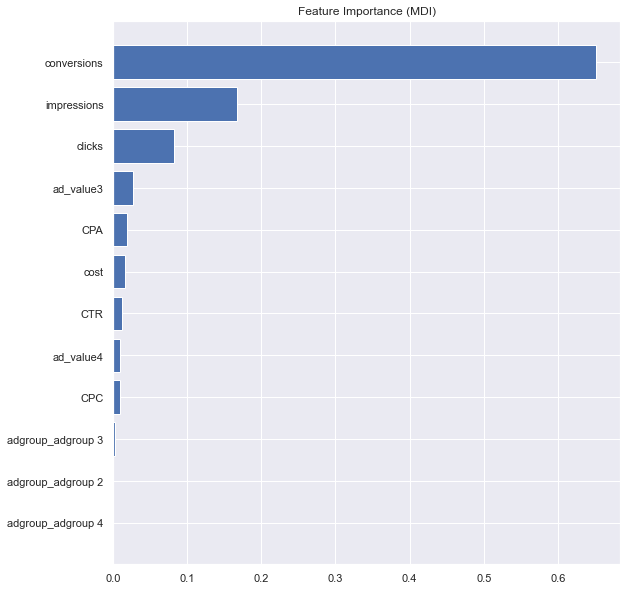

In [59]:
feature_importance = xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

# Wrapping up

In [60]:
fin_df = test_data[['conversions']].copy()
fin_df['revenue'] = predictions
fin_df

conversions     revenue
date                               
2021-01-03            1  131.355423
2021-01-03            0    1.683520
2021-01-03            0    0.041234
2021-01-03            0   -0.132699
2021-01-03            0   -0.125503
...                 ...         ...
2021-03-15            0   -0.247144
2021-03-15            0   -0.175614
2021-03-15            0    3.316806
2021-03-15            0    0.017259
2021-03-15            1  127.933525

[318 rows x 2 columns]

In [61]:
# Function to place 0 revenue wherever there is zero conversion
def funct(pred):
    if pred[0]==0:
        return 0;
    elif pred[1]<0:
        return 0;
    else:
        return pred[1];

In [62]:
fin_df['revenue'] = fin_df[['conversions','revenue']].apply(funct,axis=1)

In [63]:
fin_df

conversions     revenue
date                               
2021-01-03            1  131.355423
2021-01-03            0    0.000000
2021-01-03            0    0.000000
2021-01-03            0    0.000000
2021-01-03            0    0.000000
...                 ...         ...
2021-03-15            0    0.000000
2021-03-15            0    0.000000
2021-03-15            0    0.000000
2021-03-15            0    0.000000
2021-03-15            1  127.933525

[318 rows x 2 columns]

In [64]:
fin_df = fin_df[['revenue']]
fin_df = fin_df.set_index('revenue')

In [65]:
fin_df

Empty DataFrame
Columns: []
Index: [131.3554229736328, 0.0, 0.0, 0.0, 0.0, 0.0, 208.2141571044922, 0.0, 133.51229858398438, 0.0, 278.47369384765625, 0.0, 0.0, 304.01300048828125, 0.0, 130.9868621826172, 0.0, 159.60360717773438, 0.0, 117.8641357421875, 0.0, 0.0, 0.0, 393.6900939941406, 0.0, 0.0, 391.4585266113281, 156.5755615234375, 0.0, 0.0, 347.7767028808594, 0.0, 740.2508544921875, 218.37767028808594, 122.74691009521484, 0.0, 135.3964080810547, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 314.9350280761719, 193.7530059814453, 144.16566467285156, 0.0, 0.0, 0.0, 811.7418823242188, 0.0, 295.30206298828125, 0.0, 331.1661682128906, 0.0, 0.0, 416.3869323730469, 245.94009399414062, 0.0, 0.0, 308.79815673828125, 0.0, 0.0, 0.0, 166.7429962158203, 149.79470825195312, 537.8767700195312, 0.0, 0.0, 0.0, 346.8884582519531, 161.29457092285156, 0.0, 141.73715209960938, 0.0, 0.0, 528.05810546875, 1055.75, 0.0, 309.90850830078125, 287.10498046875, 309.5275573730469, 0.0, 520.3677978515625, 149.36114501953125, 0.0, 0.0, 0.0, 0.0, 0.0, ...]

[318 rows x 0 columns]

In [66]:
fin_df.index.max()

1665.568115234375

In [67]:
fin_df.to_csv("XgBoost.csv")